**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


## Import data

**ASTARR (GATA1)**

In [2]:
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Ratio.GATA1.unstranded.perbase.tsv"
fpath = file.path(fdiry, fname)

dat_astarr_gata1 = read_tsv(fpath, show_col_types = FALSE)
head(dat_astarr_gata1)

Chrom,Loc,Input,Output,FC_out00_inp01,FC_out01_inp01,FC_out10_inp10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786400,0,0,0,1,1
chrX,47786401,0,0,0,1,1
chrX,47786402,0,0,0,1,1
chrX,47786403,0,0,0,1,1
chrX,47786404,0,0,0,1,1
chrX,47786405,0,0,0,1,1


**ASTARR (MYC)**

In [3]:
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Ratio.MYC.unstranded.perbase.tsv"
fpath = file.path(fdiry, fname)

dat_astarr_myc = read_tsv(fpath, show_col_types = FALSE)
head(dat_astarr_myc)

Chrom,Loc,Input,Output,FC_out00_inp01,FC_out01_inp01,FC_out10_inp10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr8,126735900,0,0,0,1,1
chr8,126735901,0,0,0,1,1
chr8,126735902,0,0,0,1,1
chr8,126735903,0,0,0,1,1
chr8,126735904,0,0,0,1,1
chr8,126735905,0,0,0,1,1


**TMPRA (GATA1)**

In [4]:
### init: set file directory and path
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "count")
fname = "Tile_K562_hg38_20210130.GATA1.bed"
fpath = file.path(fdiry, fname)

### init: set column names
cnames = c("Chrom", "Start", "End", "ID", "Score", "Strand", 
           "log2fc", "Input_Count", "Output_Count", 
           "log10pval", "log10fdr", "lfc-se")

### import data
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% mutate(Loc = (Start + End) / 2)

### assign
dat_tmpra_gata1 = dat
print(dim(dat))
head(dat)

[1] 52312    13


Chrom,Start,End,ID,Score,Strand,log2fc,Input_Count,Output_Count,log10pval,log10fdr,lfc-se,Loc
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786401,47786600,X:47786401-47786600,.,+,2.30593934,2117.787,10474.869,112.1126526,110.93113079,0.10214790,47786500
chrX,47786451,47786650,X:47786451-47786650,.,+,0.78305606,1386.007,2387.119,11.3173884,10.64251685,0.11330705,47786550
chrX,47786501,47786700,X:47786501-47786700,.,+,-0.12873196,1955.626,1788.236,0.8450697,0.62872262,0.08785968,47786600
chrX,47786551,47786750,X:47786551-47786750,.,+,0.58829515,2388.997,3591.264,11.2404554,10.56667887,0.08543661,47786650
chrX,47786601,47786800,X:47786601-47786800,.,+,0.06670014,2102.916,2202.385,0.3095900,0.21047015,0.09667741,47786700
chrX,47786651,47786850,X:47786651-47786850,.,+,-0.02967703,1571.259,1537.475,0.1009399,0.06453099,0.11287406,47786750


**TMPRA (MYC)**

In [5]:
### init: set file directory and path
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "count")
fname = "Tile_K562_hg38_20210130.MYC.bed"
fpath = file.path(fdiry, fname)

### init: set column names
cnames = c("Chrom", "Start", "End", "ID", "Score", "Strand", 
           "log2fc", "Input_Count", "Output_Count", 
           "log10pval", "log10fdr", "lfc-se")

### import data
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% mutate(Loc = (Start + End) / 2)

### assign
dat_tmpra_myc = dat
print(dim(dat))
head(dat)

[1] 41898    13


Chrom,Start,End,ID,Score,Strand,log2fc,Input_Count,Output_Count,log10pval,log10fdr,lfc-se,Loc
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr8,126735901,126736100,8:126735901-126736100,.,+,3.2160073,889.8700,8270.0812,284.9689198,283.4609266,0.08903507,126736000
chr8,126735951,126736150,8:126735951-126736150,.,+,2.7418446,125.8346,840.9388,113.6888331,112.5014934,0.12060331,126736050
chr8,126736001,126736200,8:126736001-126736200,.,+,2.9727423,510.3155,4005.3567,184.5772002,183.2318991,0.10239769,126736100
chr8,126736051,126736250,8:126736051-126736250,.,+,0.5182375,702.5493,1005.3594,5.5903406,5.0334324,0.11020176,126736150
chr8,126736101,126736300,8:126736101-126736300,.,+,0.8541811,551.0831,995.4698,14.4458053,13.7295763,0.10855385,126736200
chr8,126736151,126736350,8:126736151-126736350,.,+,-0.1705365,916.6257,814.0604,0.8691763,0.6486783,0.11414081,126736250


## Summarize

**GATA1**

In [6]:
### set bins
start  = 47786400
end    = 49786750
size   = 100
breaks = seq(start, end, size)

In [7]:
### binning the data
df1 = dat_astarr_gata1
df1$group = cut(df1$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

df2 = dat_tmpra_gata1
df2$group = cut(df2$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

### summarize the ratio
df1 = df1 %>% 
    group_by(group) %>% 
    summarize(
        Input    = mean(Input),
        Output   = mean(Output),
        FC_mean  = mean(FC_out00_inp01)) %>%
    mutate(
        FC = Output / Input) %>%
    na.omit

df2 = df2 %>% 
    group_by(group) %>%
    summarize(
        Input   = mean(Input_Count),
        Output  = mean(Output_Count),
        FC_mean = mean(2^log2fc)) %>%
    mutate(
        FC = Output / Input) %>%
    na.omit

### separate bin label to left and right bound
df1 = df1 %>% 
    mutate(group = gsub("\\[|\\)", "", group)) %>%
    separate(group, c("Left", "Right")) %>%
    mutate(Left = as.integer(Left), Right = as.integer(Right))

df2 = df2 %>% 
    mutate(group = gsub("\\[|\\)", "", group)) %>%
    separate(group, c("Left", "Right")) %>%
    mutate(Left = as.integer(Left), Right = as.integer(Right))

### assign and show results
dat_astarr_gata1_meanfc = df1
dat_tmpra_gata1_meanfc  = df2

cat("ASTARR", dim(df1), "\n")
print(head(df1, 3))
cat("\n")
cat("Tiling MPRA", dim(df2), "\n")
print(head(df2, 3))

ASTARR 17081 6 
# A tibble: 3 × 6
      Left    Right       Input Output FC_mean    FC
     <int>    <int>       <dbl>  <dbl>   <dbl> <dbl>
1 47786500 47786600 0.000000332      0       0     0
2 47786600 47786700 0.000000361      0       0     0
3 47786700 47786800 0.000000513      0       0     0

Tiling MPRA 18168 6 
# A tibble: 3 × 6
      Left    Right Input Output FC_mean    FC
     <int>    <int> <dbl>  <dbl>   <dbl> <dbl>
1 47786500 47786600 1752.  6431.    3.33  3.67
2 47786600 47786700 2172.  2690.    1.21  1.24
3 47786700 47786800 1837.  1870.    1.01  1.02


**MYC**

In [8]:
### set bins
start  = 126735900
end    = 128736250
size   = 100
breaks = seq(start, end, size)

In [9]:
### binning the data
df1 = dat_astarr_myc
df1$group = cut(df1$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

df2 = dat_tmpra_myc
df2$group = cut(df2$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

### summarize the ratio
df1 = df1 %>% 
    group_by(group) %>% 
    summarize(
        Input    = mean(Input),
        Output   = mean(Output),
        FC_mean  = mean(FC_out00_inp01)) %>%
    mutate(
        FC = Output / Input) %>%
    na.omit

df2 = df2 %>% 
    group_by(group) %>%
    summarize(
        Input   = mean(Input_Count),
        Output  = mean(Output_Count),
        FC_mean = mean(2^log2fc)) %>%
    mutate(
        FC = Output / Input) %>%
    na.omit

### separate bin label to left and right bound
df1 = df1 %>% 
    mutate(group = gsub("\\[|\\)", "", group)) %>%
    separate(group, c("Left", "Right")) %>%
    mutate(Left = as.integer(Left), Right = as.integer(Right))

df2 = df2 %>% 
    mutate(group = gsub("\\[|\\)", "", group)) %>%
    separate(group, c("Left", "Right")) %>%
    mutate(Left = as.integer(Left), Right = as.integer(Right))

### assign and show results
dat_astarr_myc_meanfc = df1
dat_tmpra_myc_meanfc  = df2

cat("ASTARR", dim(df1), "\n")
print(head(df1, 3))
cat("\n")
cat("Tiling MPRA", dim(df2), "\n")
print(head(df2, 3))

ASTARR 19953 6 
# A tibble: 3 × 6
       Left     Right      Input      Output     FC_mean    FC
      <int>     <int>      <dbl>       <dbl>       <dbl> <dbl>
1 126735900 126736000 0.00000120 0.000000156 0.000000156 0.130
2 126736000 126736100 0.0000239  0.0000165   0.0000165   0.689
3 126736100 126736200 0.0000490  0.0000744   0.0000744   1.52 

Tiling MPRA 19978 6 
# A tibble: 3 × 6
       Left     Right Input Output FC_mean    FC
      <int>     <int> <dbl>  <dbl>   <dbl> <dbl>
1 126736000 126736100  508.  4556.    7.99  8.97
2 126736100 126736200  606.  2505.    4.64  4.13
3 126736200 126736300  734.   905.    1.35  1.23


## Visualization

In [12]:
dat = dat_astarr_gata1_meanfc

gp11 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Input)) +
    labs(y="Input", title="ATAC-STARR (chrX:47786400-49786750)") +
    theme_cowplot()

gp12 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Output)) +
    labs(y="Output", title="") +
    theme_cowplot()

gp13 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC)) +
    labs(y="FC", title="") +
    theme_cowplot()

gp14 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC_mean)) +
    labs(y="Mean(FC)", title="") +
    theme_cowplot()

Warning message:
“Removed 16621 rows containing missing values (geom_rect).”


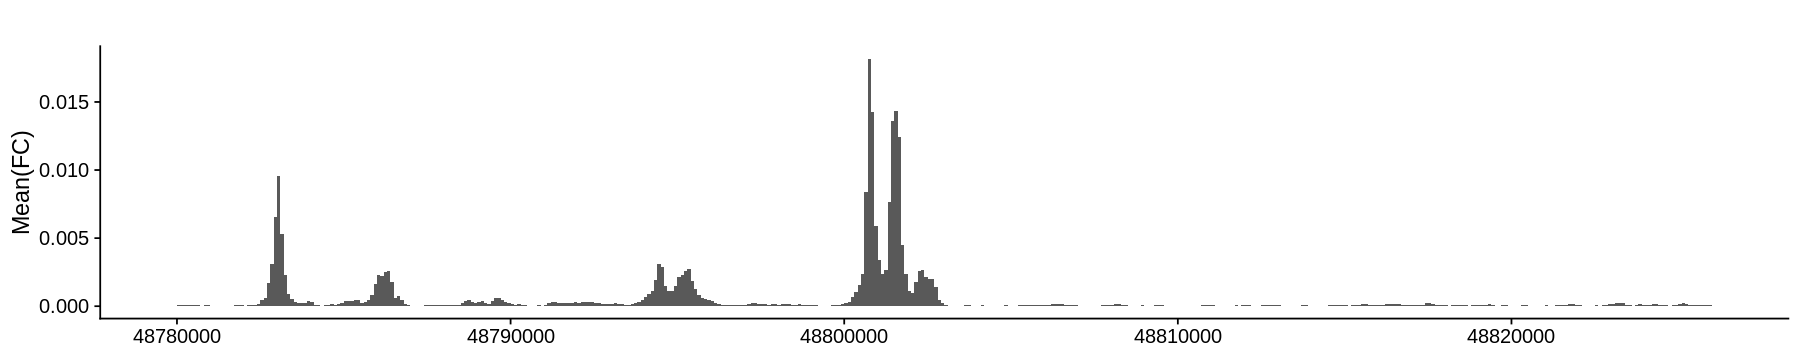

In [13]:
options(repr.plot.height=3, repr.plot.width=15)
print(gp14+xlim(48780000, 48826000))

Warning message:
“Removed 16621 rows containing missing values (geom_rect).”
Warning message:
“Removed 16621 rows containing missing values (geom_rect).”
Warning message:
“Removed 16621 rows containing missing values (geom_rect).”
Warning message:
“Removed 16621 rows containing missing values (geom_rect).”


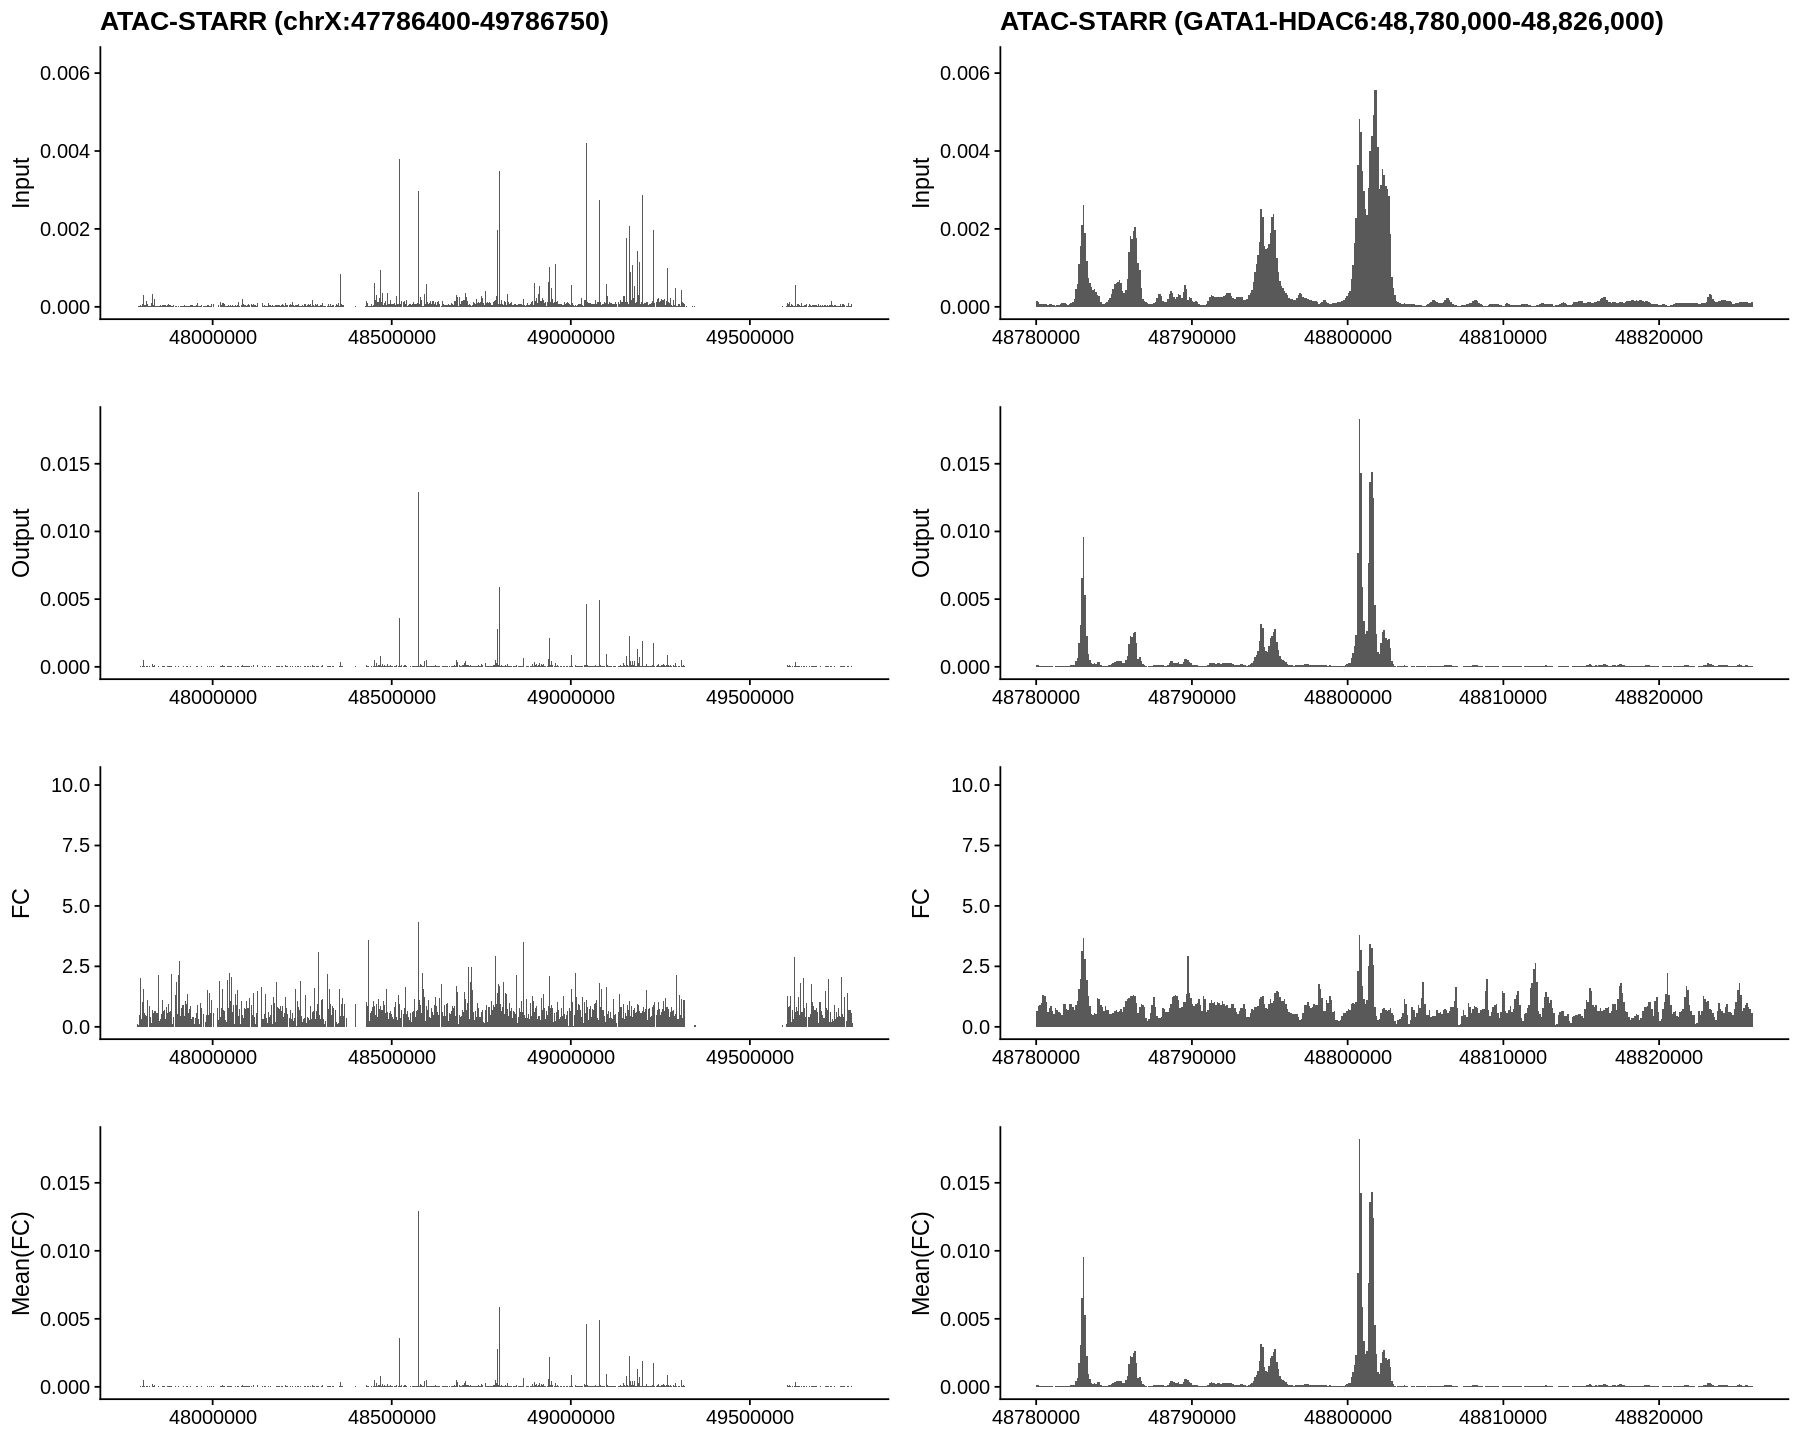

In [14]:
options(repr.plot.height=12, repr.plot.width=15)
start = 48780000
end   = 48826000
plot_grid(
    gp11,
    gp11 + xlim(start, end) + labs(title="ATAC-STARR (GATA1-HDAC6:48,780,000-48,826,000)"),
    gp12,
    gp12 + xlim(start, end),
    gp13,
    gp13 + xlim(start, end),
    gp14,
    gp14 + xlim(start, end),
    align="v",  
    ncol=2,
    nrow=4)

Warning message:
“Removed 16621 rows containing missing values (geom_rect).”
Warning message:
“Removed 16621 rows containing missing values (geom_rect).”
Warning message:
“Removed 16621 rows containing missing values (geom_rect).”
Warning message:
“Removed 16621 rows containing missing values (geom_rect).”


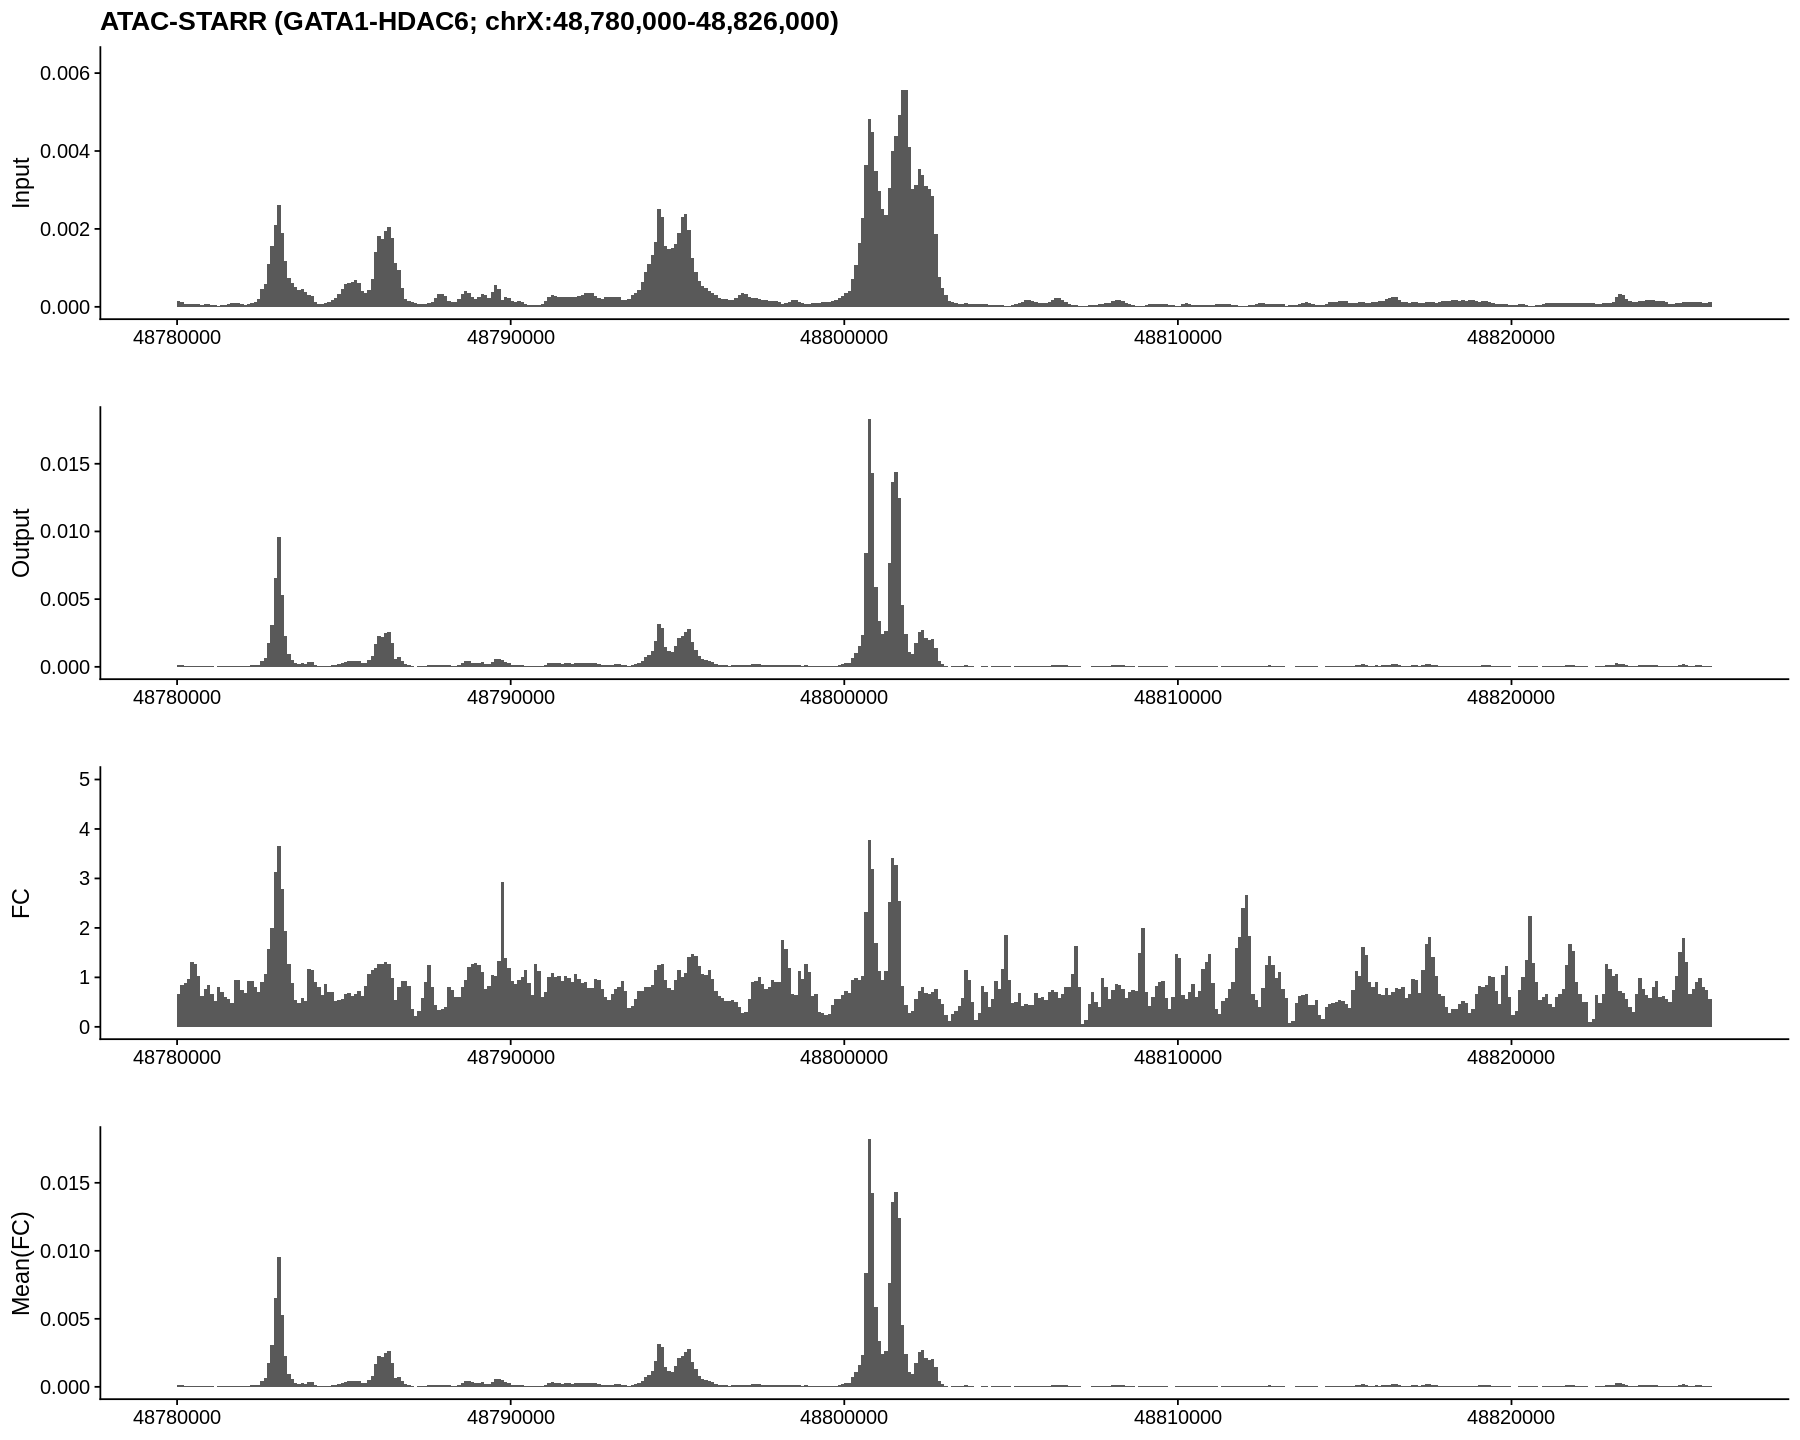

In [15]:
options(repr.plot.height=12, repr.plot.width=15)
start = 48780000
end   = 48826000
plot_grid(
    gp11 + xlim(start, end) + labs(title="ATAC-STARR (GATA1-HDAC6; chrX:48,780,000-48,826,000)"),
    gp12 + xlim(start, end),
    gp13 + xlim(start, end) + ylim(0, 5.0),
    gp14 + xlim(start, end),
    align="v",  
    ncol=1,
    nrow=4)

**MYC**

In [43]:
dat = dat_astarr_myc_meanfc

gp11 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Input)) +
    labs(y="Input", title="ATAC-STARR (chr8:126,735,900-128,736,250)") +
    theme_cowplot()

gp12 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Output)) +
    labs(y="Output", title="") +
    theme_cowplot()

gp13 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC)) +
    labs(y="FC", title="") +
    theme_cowplot()

gp14 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC_mean)) +
    labs(y="Mean(FC)", title="") +
    theme_cowplot()

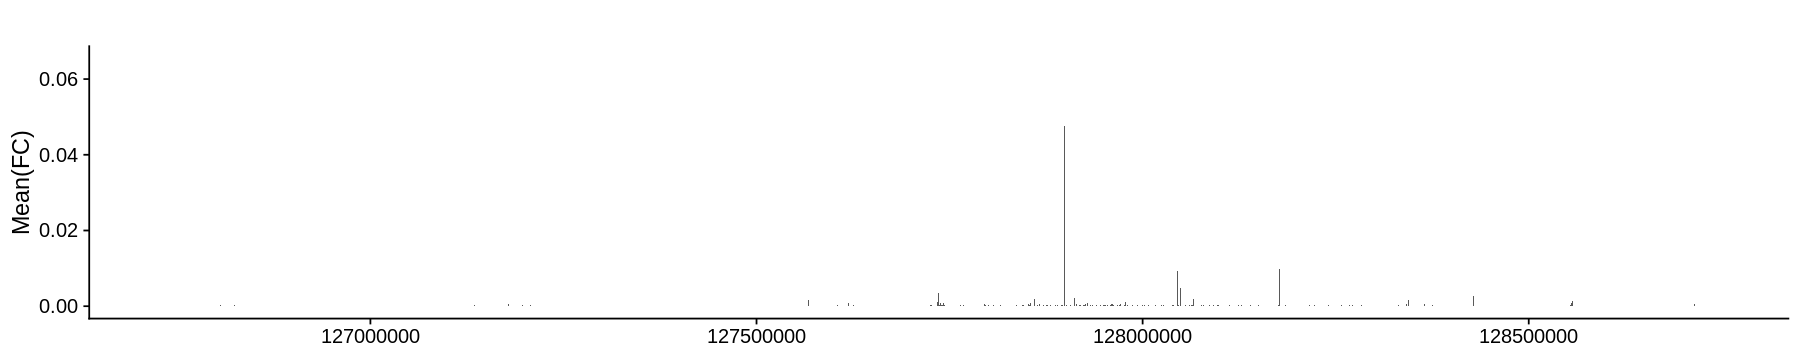

In [44]:
options(repr.plot.height=3, repr.plot.width=15)
print(gp14)

Warning message:
“Removed 19860 rows containing missing values (geom_rect).”
Warning message:
“Removed 19860 rows containing missing values (geom_rect).”
Warning message:
“Removed 19860 rows containing missing values (geom_rect).”
Warning message:
“Removed 19860 rows containing missing values (geom_rect).”


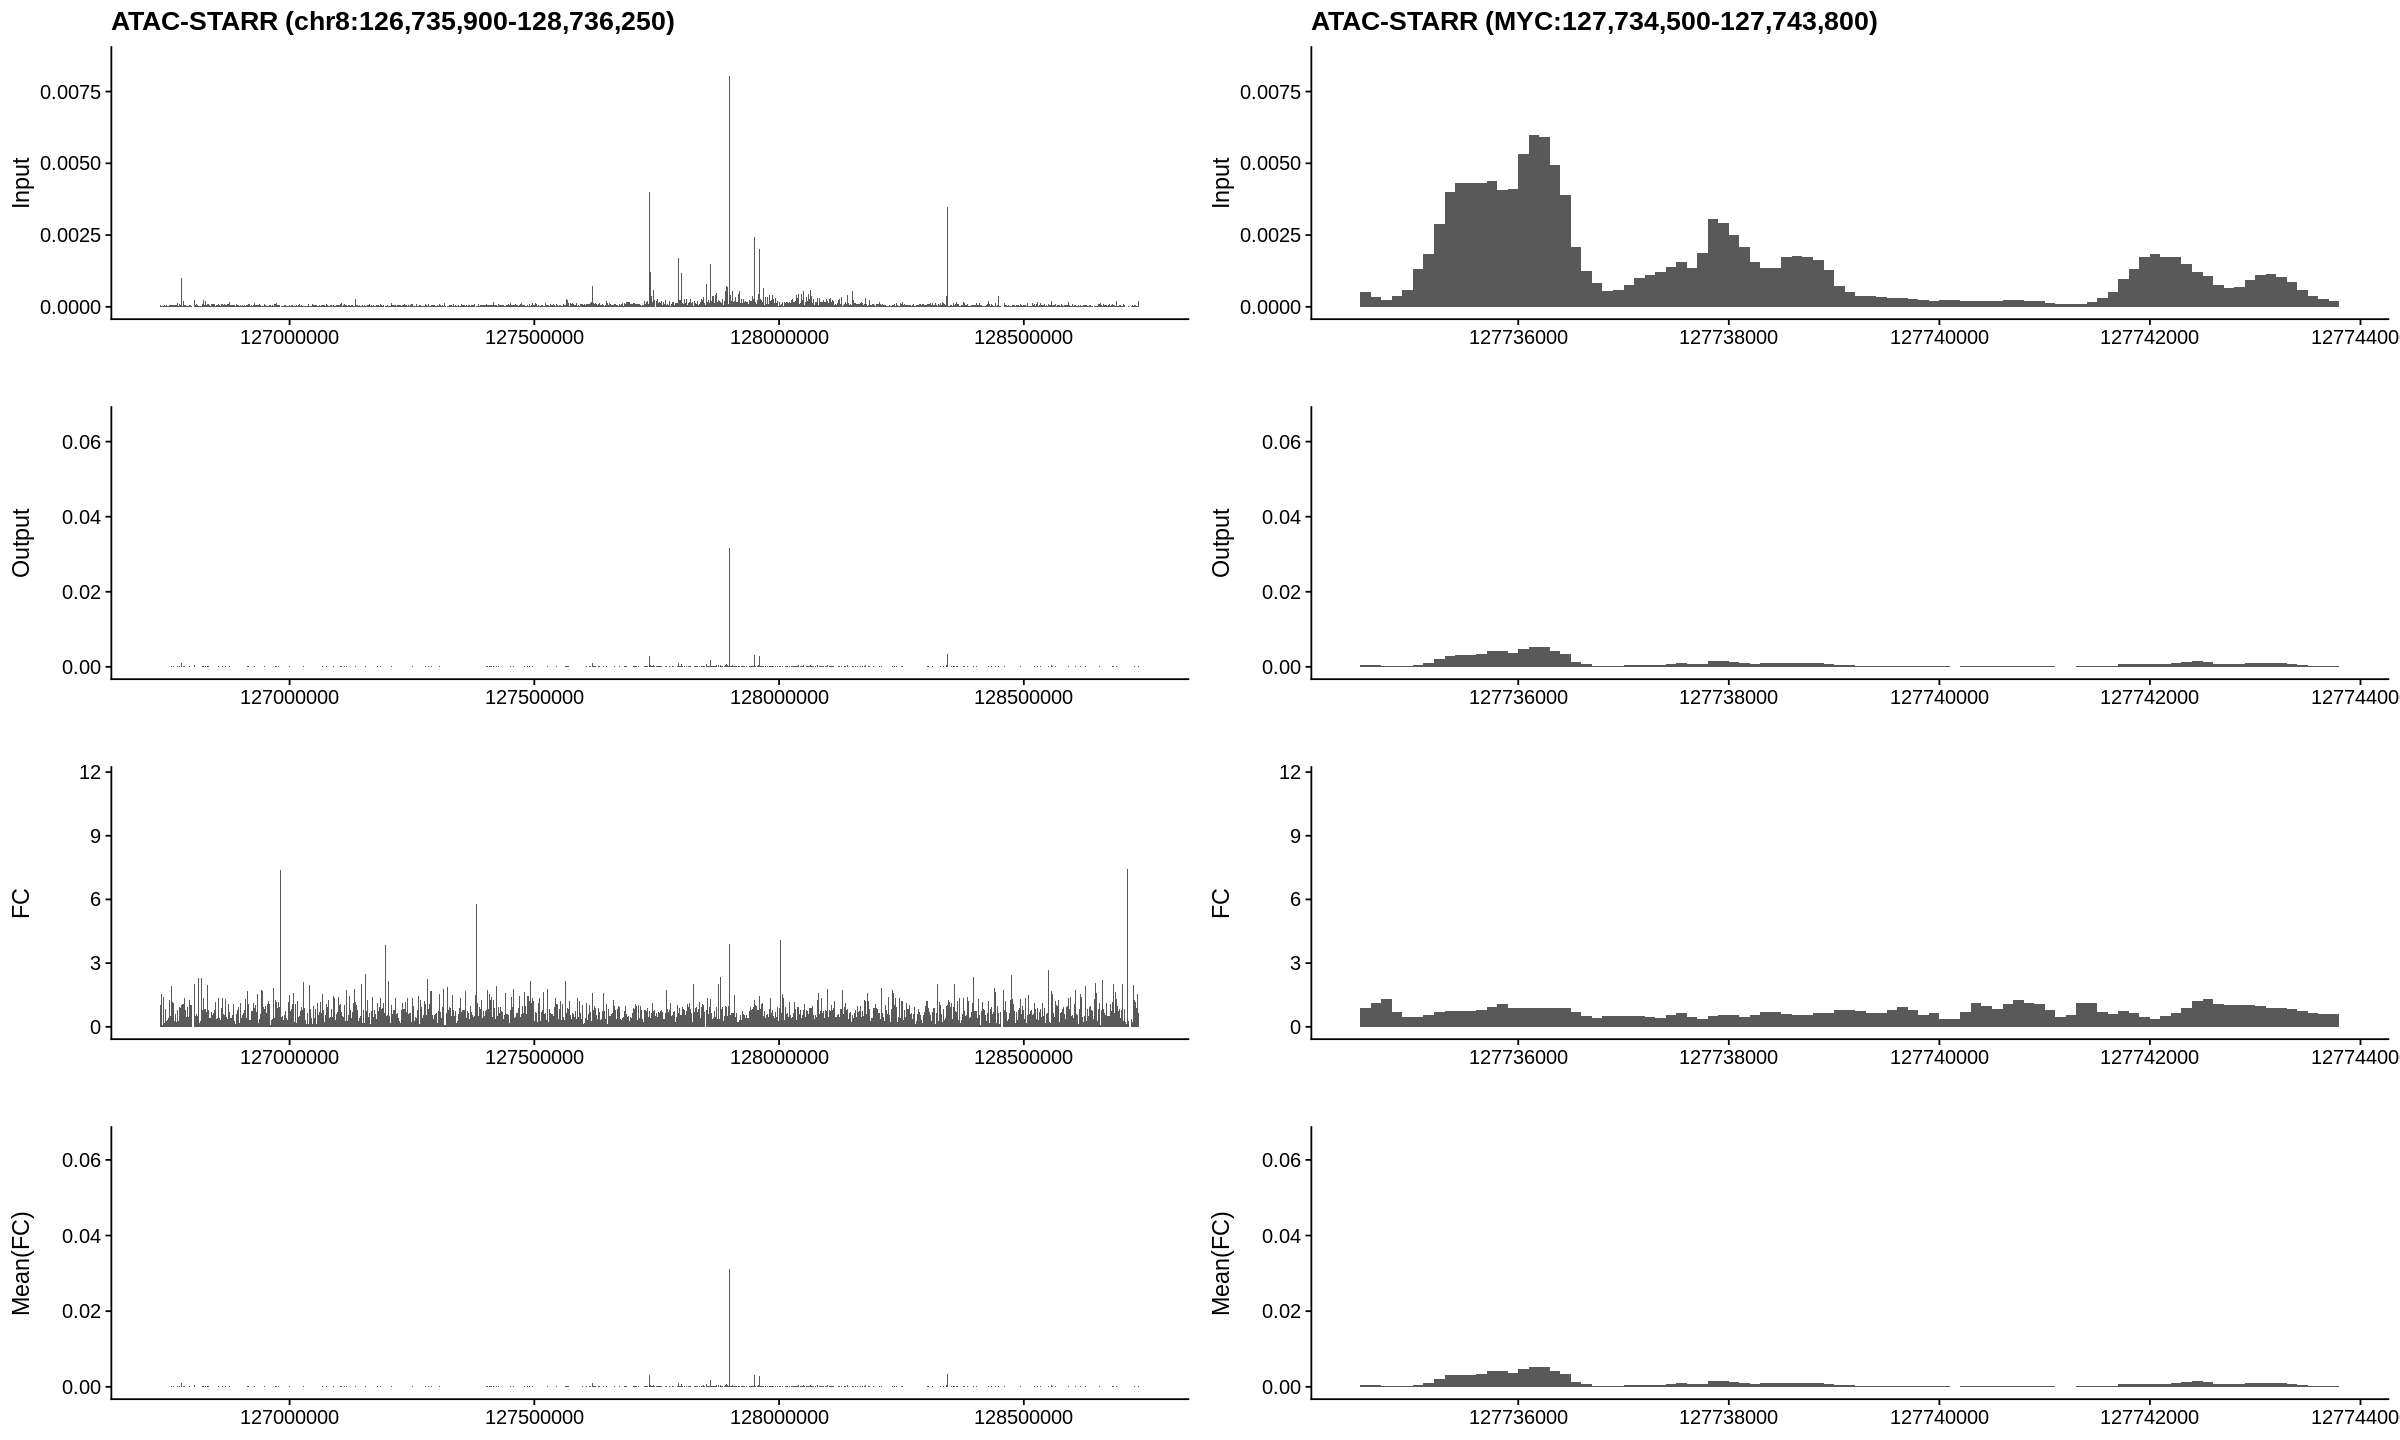

In [45]:
options(repr.plot.height=12, repr.plot.width=20)
start = 127734500
end   = 127743800
plot_grid(
    gp11,
    gp11 + xlim(start, end) + labs(title="ATAC-STARR (MYC:127,734,500-127,743,800)"),
    gp12,
    gp12 + xlim(start, end),
    gp13,
    gp13 + xlim(start, end),
    gp14,
    gp14 + xlim(start, end),
    align="v",  
    ncol=2,
    nrow=4)

Warning message:
“Removed 19860 rows containing missing values (geom_rect).”
Warning message:
“Removed 19860 rows containing missing values (geom_rect).”
Warning message:
“Removed 19860 rows containing missing values (geom_rect).”
Warning message:
“Removed 19860 rows containing missing values (geom_rect).”


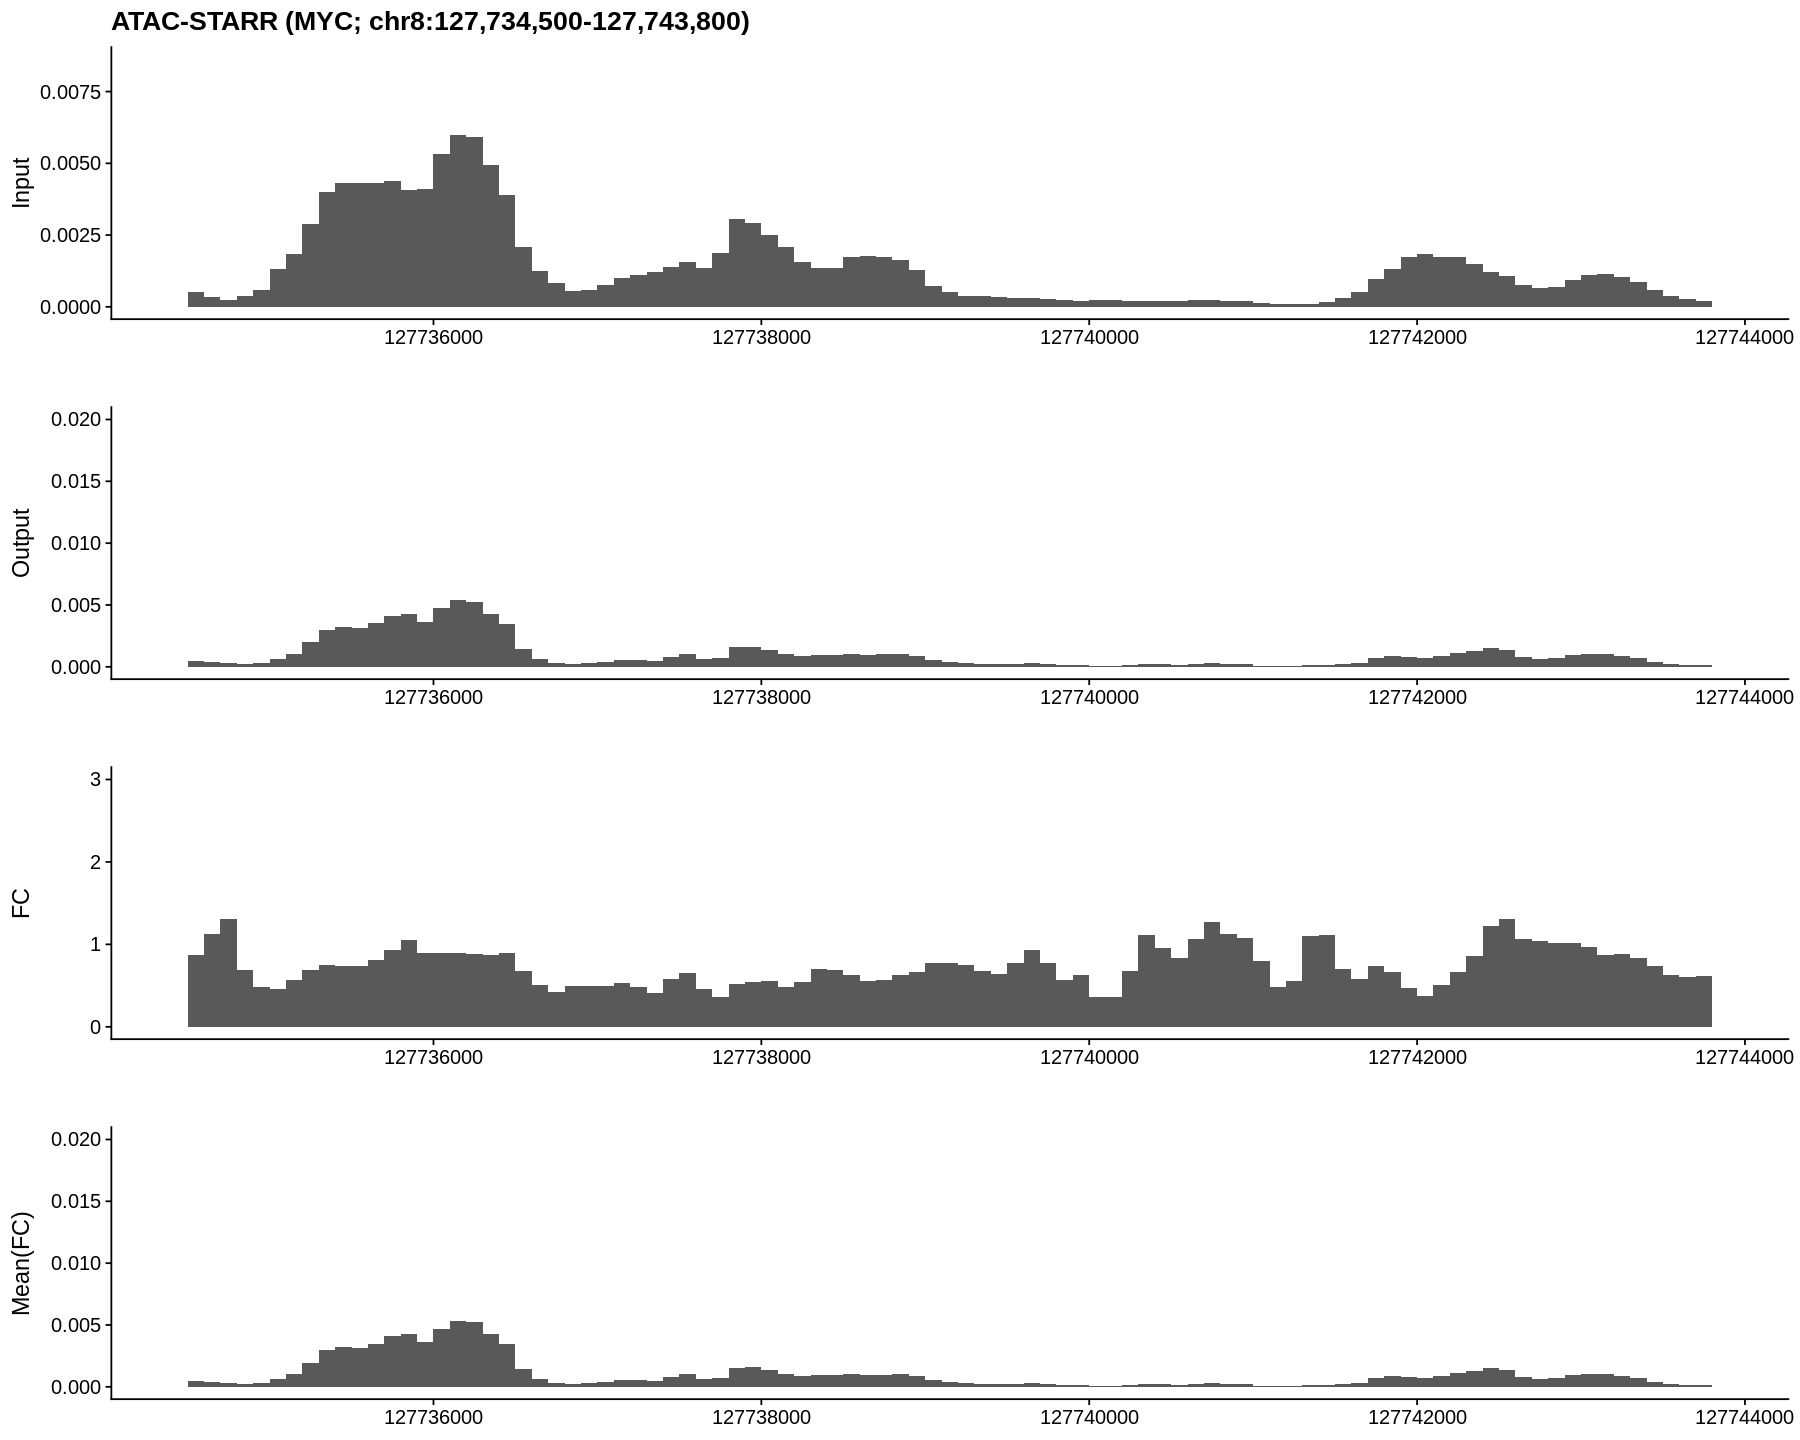

In [49]:
options(repr.plot.height=12, repr.plot.width=15)
start = 127734500
end   = 127743800
plot_grid(
    gp11 + xlim(start, end) + labs(title="ATAC-STARR (MYC; chr8:127,734,500-127,743,800)"),
    gp12 + xlim(start, end) + ylim(0, 0.02),
    gp13 + xlim(start, end) + ylim(0, 3),
    gp14 + xlim(start, end) + ylim(0, 0.02),
    align="v",  
    ncol=1,
    nrow=4)

## TMPRA

In [50]:
dat = dat_tmpra_gata1_meanfc

gp11 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Input)) +
    labs(y="Input", title="Tiling MPRA (chrX:47786400-49786750)") +
    theme_cowplot()

gp12 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Output)) +
    labs(y="Output", title="") +
    theme_cowplot()

gp13 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC)) +
    labs(y="FC", title="") +
    theme_cowplot()

gp14 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC_mean)) +
    labs(y="Mean(FC)", title="") +
    theme_cowplot()

Warning message:
“Removed 17709 rows containing missing values (geom_rect).”
Warning message:
“Removed 17709 rows containing missing values (geom_rect).”
Warning message:
“Removed 17709 rows containing missing values (geom_rect).”
Warning message:
“Removed 17709 rows containing missing values (geom_rect).”


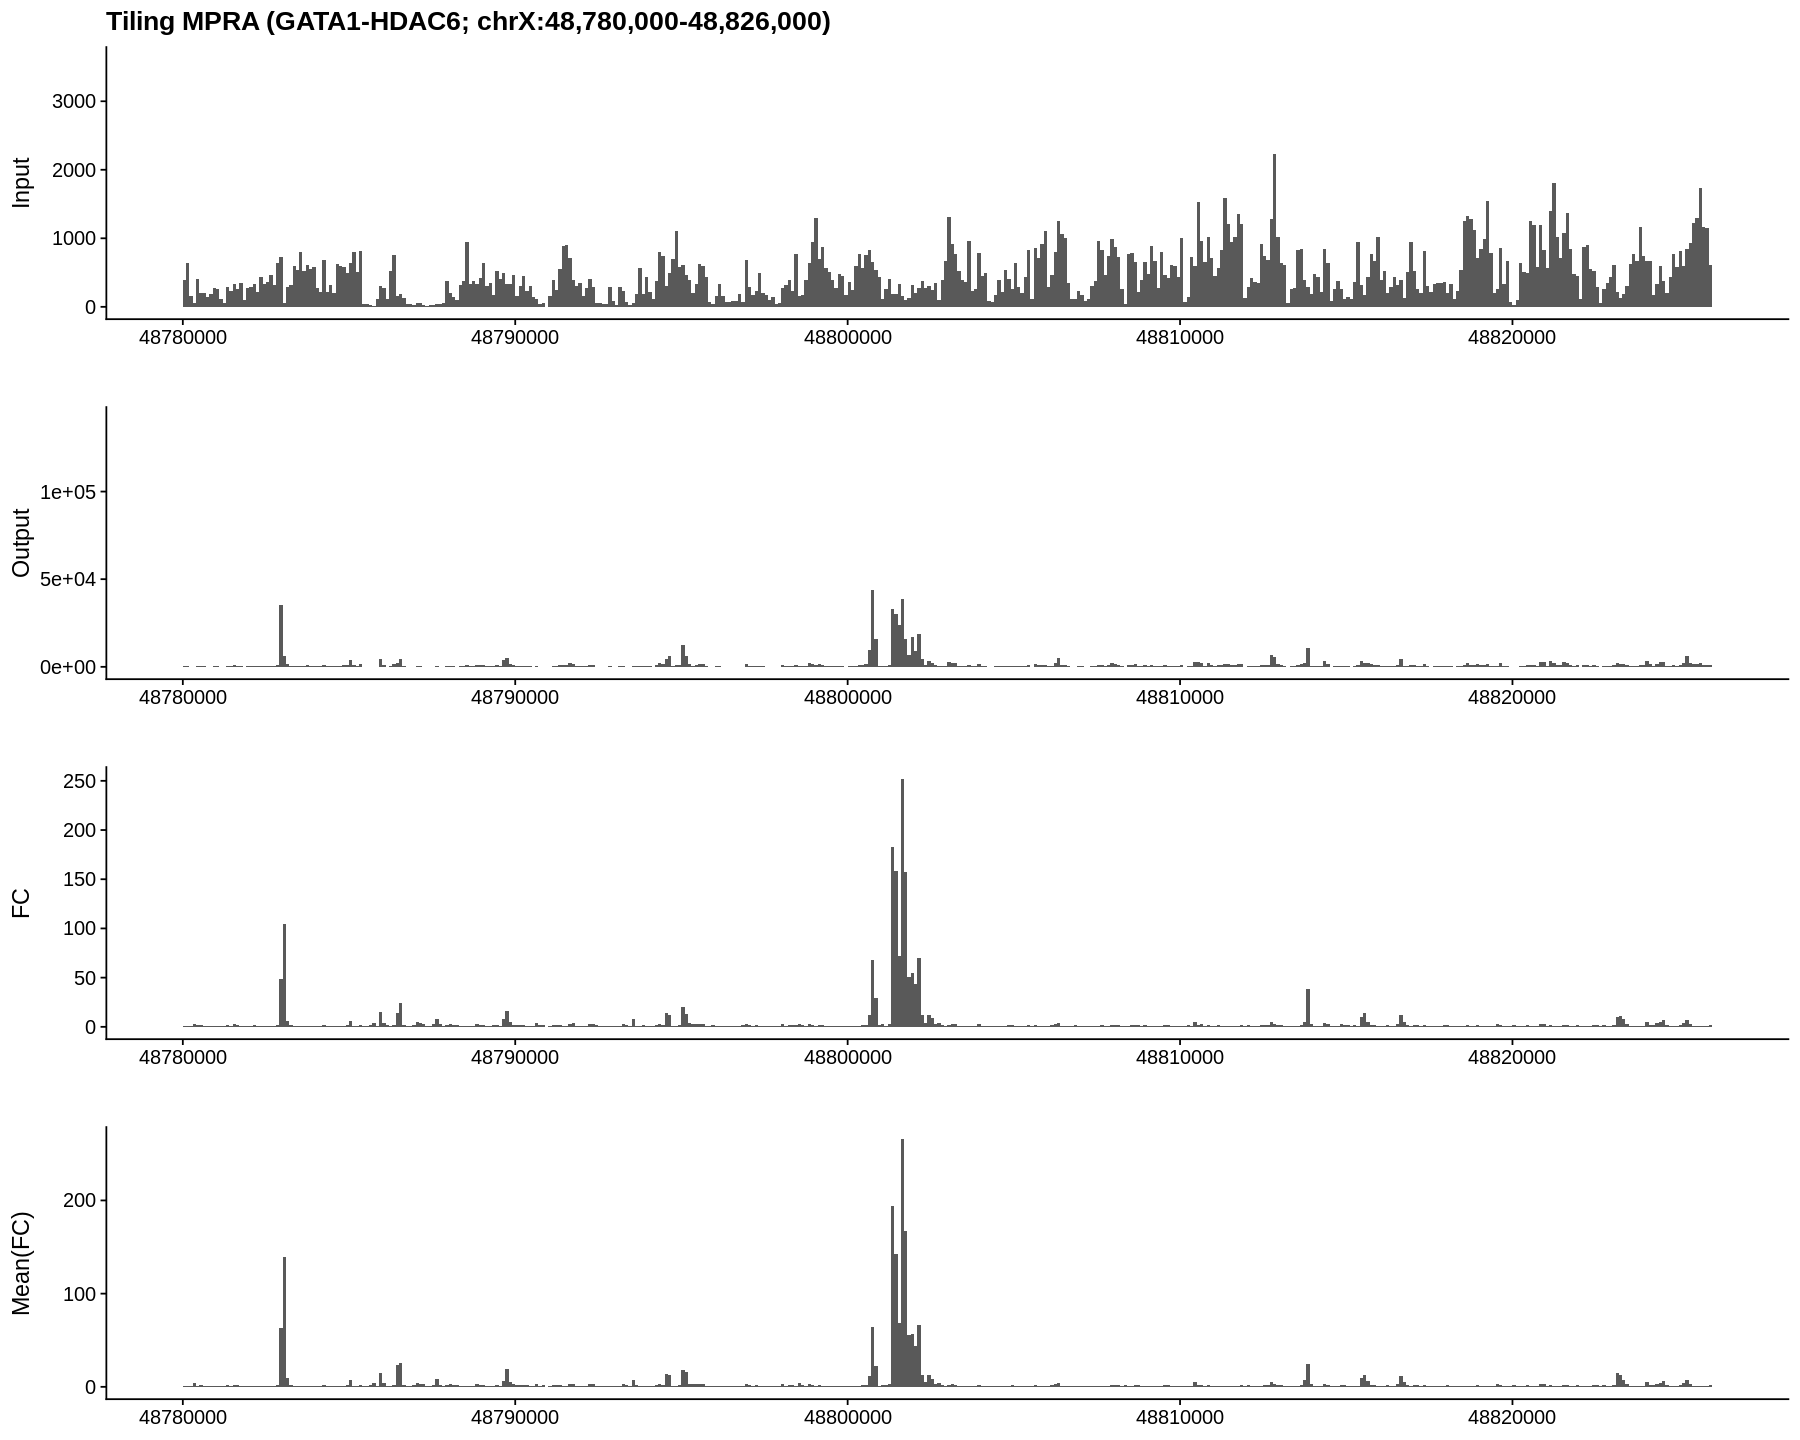

In [52]:
options(repr.plot.height=12, repr.plot.width=15)
start = 48780000
end   = 48826000
plot_grid(
    gp11 + xlim(start, end) + labs(title="Tiling MPRA (GATA1-HDAC6; chrX:48,780,000-48,826,000)"),
    gp12 + xlim(start, end),
    gp13 + xlim(start, end),
    gp14 + xlim(start, end),
    align="v",  
    ncol=1,
    nrow=4)

In [53]:
dat = dat_tmpra_myc_meanfc

gp11 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Input)) +
    labs(y="Input", title="Tiling MPRA (chr8:126,735,900-128,736,250)") +
    theme_cowplot()

gp12 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Output)) +
    labs(y="Output", title="") +
    theme_cowplot()

gp13 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC)) +
    labs(y="FC", title="") +
    theme_cowplot()

gp14 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC_mean)) +
    labs(y="Mean(FC)", title="") +
    theme_cowplot()

Warning message:
“Removed 19885 rows containing missing values (geom_rect).”
Warning message:
“Removed 19885 rows containing missing values (geom_rect).”
Warning message:
“Removed 19885 rows containing missing values (geom_rect).”
Warning message:
“Removed 19885 rows containing missing values (geom_rect).”


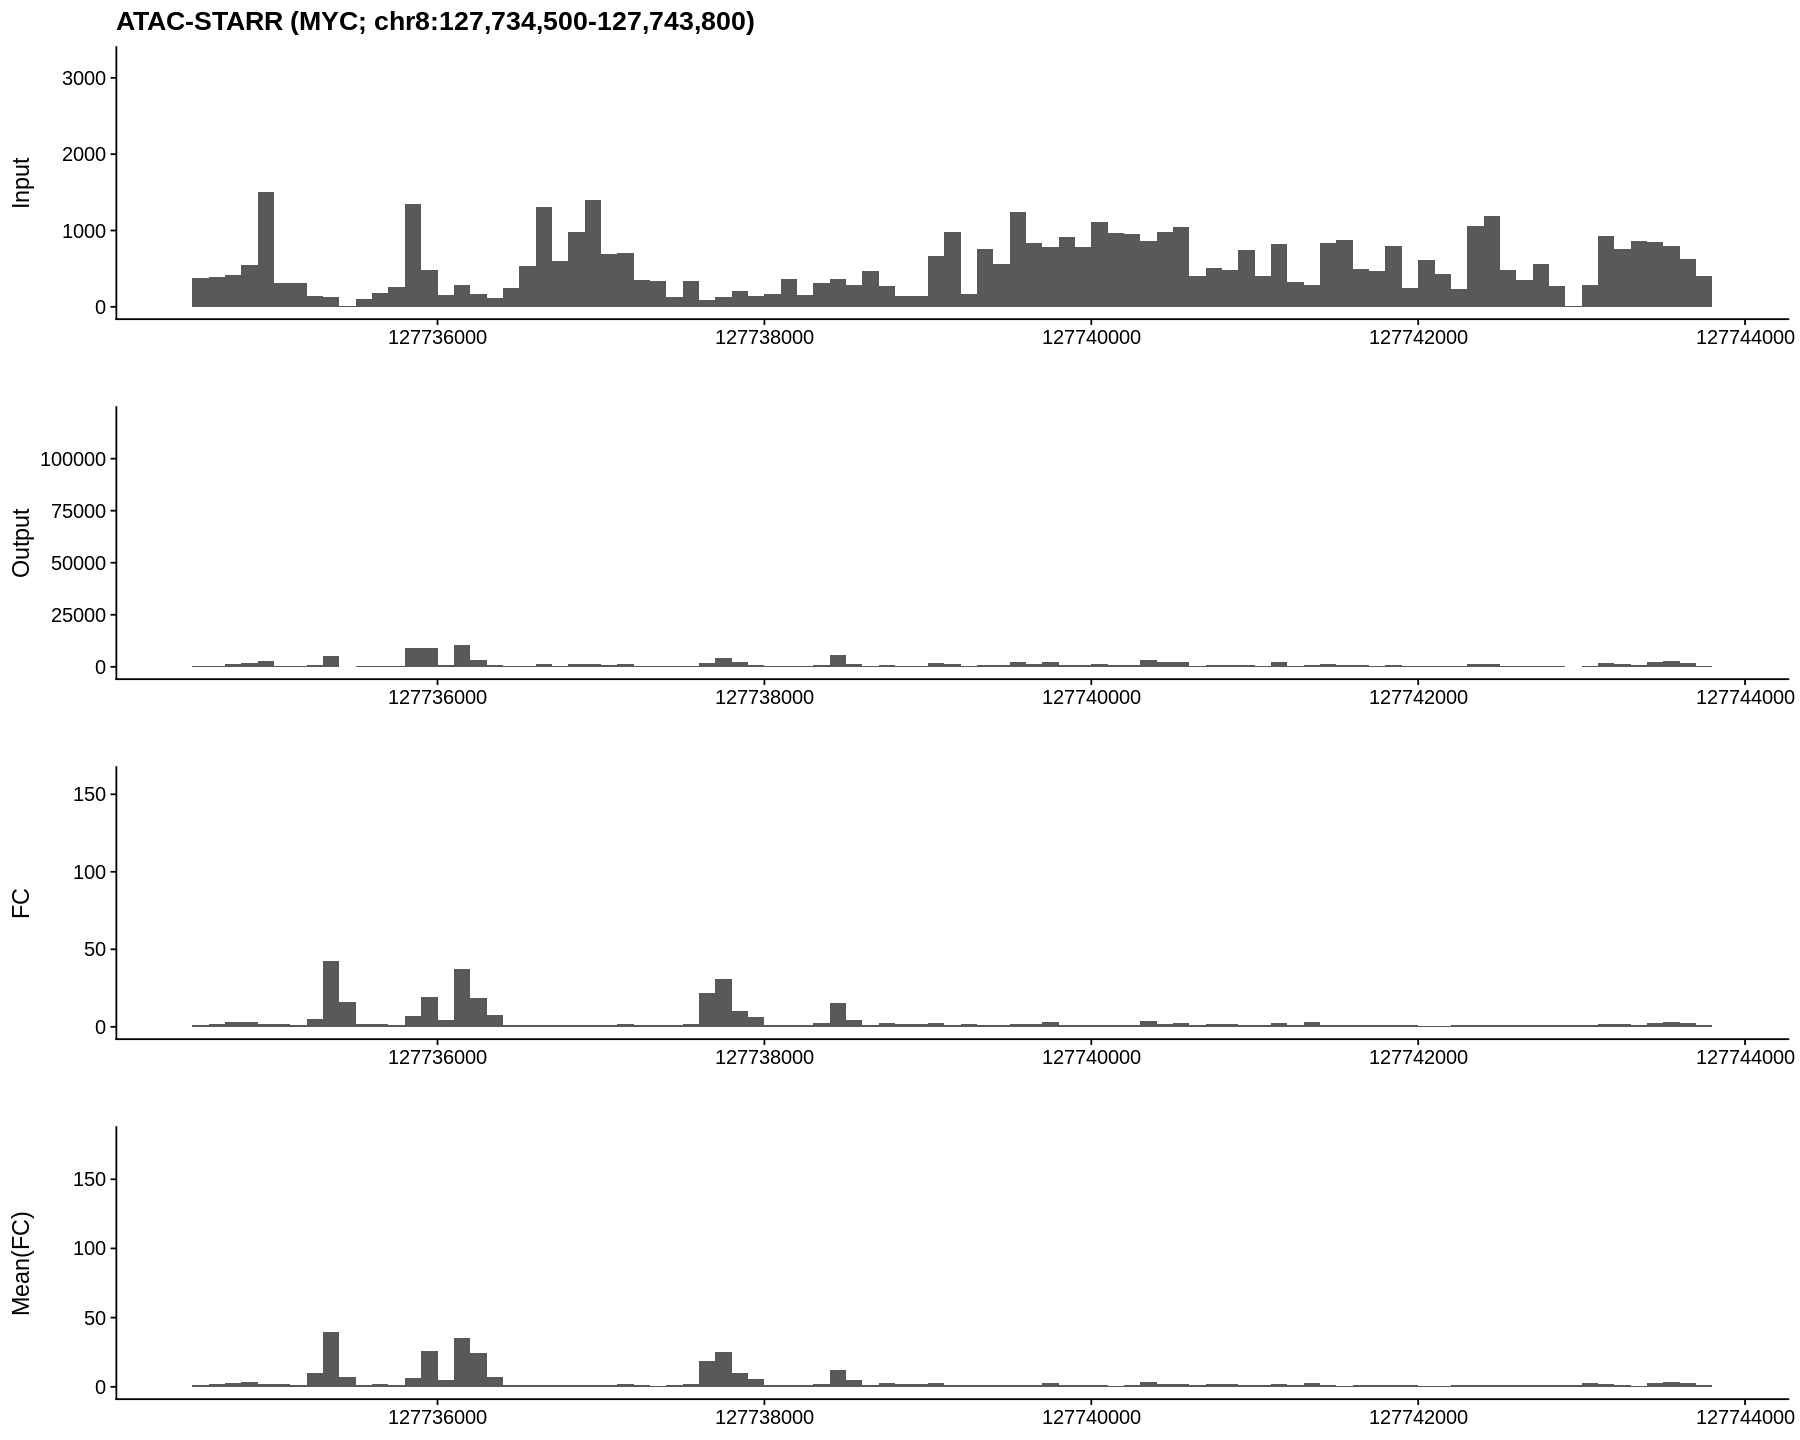

In [54]:
options(repr.plot.height=12, repr.plot.width=15)
start = 127734500
end   = 127743800
plot_grid(
    gp11 + xlim(start, end) + labs(title="ATAC-STARR (MYC; chr8:127,734,500-127,743,800)"),
    gp12 + xlim(start, end) ,
    gp13 + xlim(start, end) ,
    gp14 + xlim(start, end) ,
    align="v",  
    ncol=1,
    nrow=4)